## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request

## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv",index_col=0)
df.index.name=None

## Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [5]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [6]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [7]:
target= 'Price_in_euros'

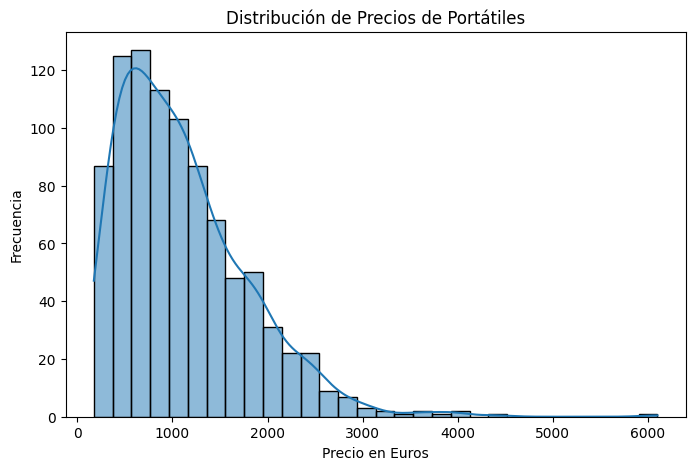

In [8]:
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.figure(figsize=(8, 5))  
sns.histplot(df['Price_in_euros'], bins=30, kde=True)  
plt.xlabel('Precio en Euros')  
plt.ylabel('Frecuencia')  
plt.title('Distribución de Precios de Portátiles')  
plt.show()

In [9]:
numeric_df = df.select_dtypes(include=['number'])

# Calcular correlaciones con la variable target
correlations = numeric_df.corr()['Price_in_euros'].drop('Price_in_euros')

# Ordenar por valor absoluto de mayor a menor
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Mostrar el resultado
print(correlations_sorted)

Inches    0.071043
Name: Price_in_euros, dtype: float64


In [10]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_in_euros'],
      dtype='object')

In [11]:
# Seleccionar columnas categóricas (no numéricas)
categorical_cols = df.select_dtypes(exclude=['number']).columns  

# Mostrar valores únicos para cada columna categórica
for col in categorical_cols:
    print(f"Valores únicos en '{col}':\n", df[col].unique(), "\n")

Valores únicos en 'Company':
 ['HP' 'Dell' 'Apple' 'Lenovo' 'MSI' 'Toshiba' 'Acer' 'Chuwi' 'Asus'
 'Huawei' 'Razer' 'Mediacom' 'Google' 'Samsung' 'Xiaomi' 'Microsoft'
 'Vero' 'LG' 'Fujitsu'] 

Valores únicos en 'Product':
 ['250 G6' 'Inspiron 7559' 'ProBook 450' 'Macbook Air' 'Inspiron 3567'
 'ProBook 650' 'Envy 13-AD007nv' 'IdeaPad 320-15IKB' 'GL72M 7REX'
 'Thinkpad T570' 'MacBook Pro' 'Ideapad 320-15IKBR' 'IdeaPad 320-15IAP'
 'Portege Z30-C-16P' 'Latitude 5590' 'IdeaPad 110-15IBR' 'GP72MVR 7RFX'
 'ThinkPad X1' 'GL62 6QF' 'Portege X30-D-10X' 'Chromebook 11'
 'Inspiron 5567' 'IdeaPad 510s-14IKB' 'LapBook 15.6"' 'GE62 Apache'
 'ZBook 17' 'Inspiron 7567' 'VivoBook Pro' 'Pro P2540UA-XO0198T'
 'Thinkpad 13' 'MateBook X' 'Vostro 5568' '250 G5' 'EliteBook 840'
 'Inspiron 7570' 'IdeaPad Y700-15ISK' 'ThinkPad P51' 'IdeaPad 320-15IKBN'
 'Portege Z30-C-1CV' 'XPS 13' 'IdeaPad 510-15IKB'
 '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'Blade Pro' 'Rog Strix'
 'ProBook 440' '15-AC110nv (i7-6500U/6GB/1TB

In [12]:
df["inches"]=df.Inches.astype(float)
df["ram_gb"]=df['Ram'].str.replace('GB','').astype(int)
df['weight_kg']=df['Weight'].str.replace('kg','').astype(float)

In [13]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,inches,ram_gb,weight_kg
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,15.6,8,1.86
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,15.6,16,2.59
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,15.6,8,2.04
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,13.3,8,1.34
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,15.6,4,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,15.6,8,2.20
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,13.3,8,1.48
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,15.6,8,2.20
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,15.6,4,1.86


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
 12  inches            912 non-null    float64
 13  ram_gb            912 non-null    int32  
 14  weight_kg         912 non-null    float64
dtypes: float64(4), int32(1), object(10)
memory usage: 110.4+ KB


In [15]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_in_euros', 'inches',
       'ram_gb', 'weight_kg'],
      dtype='object')

In [16]:
features_cat=['Company', 'Product', 'TypeName','ScreenResolution', 'Cpu','Gpu', 'OpSys']

In [17]:
from scipy.stats import f_oneway

# Función para realizar la prueba ANOVA para una columna categórica
def anova_test(df, col):
    # Crear una lista de valores de 'Price_in_euros' para cada categoría en la variable categórica
    groups = [df[df[col] == category]['Price_in_euros'] for category in df[col].unique()]
    
    # Realizar la prueba ANOVA
    f_stat, p_value = f_oneway(*groups)
    
    return p_value  # Retornar el valor p de la prueba

# Aplicar la prueba ANOVA para las variables categóricas
for col in features_cat:
    p_value = anova_test(df, col)
    print(f"Valor p de ANOVA para '{col}': {p_value}")

Valor p de ANOVA para 'Company': 1.870590724382312e-25
Valor p de ANOVA para 'Product': 7.874518679231296e-108
Valor p de ANOVA para 'TypeName': 5.614483898088773e-99
Valor p de ANOVA para 'ScreenResolution': 3.940293313717892e-77
Valor p de ANOVA para 'Cpu': 8.486815112707918e-121
Valor p de ANOVA para 'Gpu': 4.705316304392847e-122
Valor p de ANOVA para 'OpSys': 1.0281069131390438e-19


In [18]:
# Crear un diccionario para las categorías de marcas
company_group_mapping = {
    'Apple': 'Gama Alta',
    'Microsoft': 'Gama Alta',
    'Razer': 'Gama Alta',
    'Google': 'Gama Alta',
    'LG': 'Gama Alta',
    'Dell': 'Gama Media',
    'Lenovo': 'Gama Media',
    'Asus': 'Gama Media',
    'HP': 'Gama Media',
    'Samsung': 'Gama Media',
    'Acer': 'Gama Baja',
    'Toshiba': 'Gama Baja',
    'Xiaomi': 'Gama Baja',
    'Chuwi': 'Gama Baja',
    'Mediacom': 'Gama Baja',
    'Fujitsu': 'Gama Baja',
    'MSI': 'Gaming/Especializados',
    'Huawei': 'Gama Alta',  # <- Nueva adición
    'Vero': 'Gama Baja'
}

# Aplicar el mapeo de las marcas a la nueva columna
df['Company_Group'] = df['Company'].map(company_group_mapping)

df[['Company', 'Company_Group']].head()

,Company,Company_Group
755,HP,Gama Media
618,Dell,Gama Media
909,HP,Gama Media
2,Apple,Gama Alta
286,Dell,Gama Media


In [19]:
# Crear un diccionario para el mapeo de las nuevas categorías
type_name_mapping = {
    'Gaming': 'Alto rendimiento',
    'Workstation': 'Alto rendimiento',
    'Notebook': 'Intermedio',
    'Ultrabook': 'Intermedio',
    'Netbook': 'Bajo rendimiento',
    '2 in 1 Convertible': 'Bajo rendimiento'
}

# Reemplazar los valores de 'TypeName' con las nuevas categorías
df['TypeName_Group'] = df['TypeName'].map(type_name_mapping)

# Convertir las nuevas categorías en valores numéricos
type_name_group_numerical = {
    'Alto rendimiento': 3,
    'Intermedio': 2,
    'Bajo rendimiento': 1
}

# Aplicar el mapeo numérico
df['TypeName_Group_Num'] = df['TypeName_Group'].map(type_name_group_numerical)

# Ver el resultado
print(df[['TypeName', 'TypeName_Group', 'TypeName_Group_Num']].head())

      TypeName    TypeName_Group  TypeName_Group_Num
755   Notebook        Intermedio                   2
618     Gaming  Alto rendimiento                   3
909   Notebook        Intermedio                   2
2    Ultrabook        Intermedio                   2
286   Notebook        Intermedio                   2


In [70]:
import re

# Función para extraer el tamaño total en GB
def extract_total_gb(memory):
    # Inicializamos el tamaño total
    total_gb = 0
    
    # Separamos por "+" en caso de que haya varias combinaciones
    memory_items = memory.split('+')
    
    for item in memory_items:
        # Extraemos el tamaño (en GB o TB) y unidad
        match = re.match(r'(\d+\.?\d*)\s*(GB|TB)', item.strip())
        if match:
            size = float(match.group(1))  # Tamaño numérico
            unit = match.group(2)  # Unidad (GB o TB)
            
            # Si es TB, lo convertimos a GB
            if unit == 'TB':
                size *= 1024  # Convertir a GB
            total_gb += size  # Sumamos el tamaño total en GB
    
    return total_gb

# Función para extraer los tipos de discos (SSD, HDD, Flash, Hybrid)
def extract_disk_types(memory):
    # Buscamos los tipos de discos en la cadena
    disk_types = []
    if 'SSD' in memory:
        disk_types.append('SSD')
    if 'HDD' in memory:
        disk_types.append('HDD')
    if 'Flash' in memory:
        disk_types.append('Flash')
    if 'Hybrid' in memory:
        disk_types.append('Hybrid')
    
    return ', '.join(disk_types)  # Devolvemos los tipos como una cadena separada por coma

# Aplicar las funciones a la columna 'Memory' para crear las nuevas columnas
df['Total_GB'] = df['Memory'].apply(extract_total_gb)
df['Disk_Types'] = df['Memory'].apply(extract_disk_types)

# Ver el resultado
print(df[['Memory', 'Total_GB', 'Disk_Types']].head())


                  Memory  Total_GB Disk_Types
755            256GB SSD     256.0        SSD
618              1TB HDD    1024.0        HDD
909              1TB HDD    1024.0        HDD
2    128GB Flash Storage     128.0      Flash
286              1TB HDD    1024.0        HDD


In [71]:
print(df['Disk_Types'].unique())

['SSD' 'HDD' 'Flash' 'SSD, HDD' 'Hybrid' 'HDD, Flash']


In [72]:
from sklearn.preprocessing import LabelEncoder

# Primero, redefinimos los valores de 'Disk_Types' a las 4 categorías que mencionas
df['Disk_Types'] = df['Disk_Types'].replace({
    'SSD': 'SSD',
    'HDD': 'HDD',
    'Flash': 'Flash',
    'SSD, HDD': 'Hybrid',
    'SSD, Hybrid': 'Hybrid',
    'Hybrid': 'Hybrid',
    'HDD, Flash': 'Hybrid'
})

# Aplicar Label Encoding para que 'SSD', 'HDD', 'Flash' y 'Hybrid' sean codificados numéricamente
le = LabelEncoder()
df['Disk_Types'] = le.fit_transform(df['Disk_Types'])




In [73]:
import re

# Función para extraer el número de píxeles de la resolución
def extract_pixels(screen_resolution):
    # Buscar el formato 'Ancho x Alto' (por ejemplo, 1920x1080)
    match = re.search(r'(\d+)x(\d+)', screen_resolution)
    
    if match:
        # Multiplicamos las dimensiones para obtener el total de píxeles
        width = int(match.group(1))
        height = int(match.group(2))
        return width * height  # Número total de píxeles
    return 0  # Si no se encuentra una resolución válida

# Función para extraer la categoría de la resolución (como 'Full HD', '4K', etc.)
def extract_resolution_type(screen_resolution):
    # Buscar la parte de la resolución que es la etiqueta (ej. 'Full HD', '4K', etc.)
    # El texto aparece antes de la resolución de píxeles
    match = re.search(r'([A-Za-z\s]+)(\d{4}x\d{3,4})', screen_resolution)
    
    if match:
        return match.group(1).strip()  # El nombre de la resolución, por ejemplo 'Full HD'
    return 'Unknown'  # Si no se puede extraer, ponemos 'Unknown'

# Aplicar las funciones a la columna 'ScreenResolution'
df['Screen_Resolution_Pixels'] = df['ScreenResolution'].apply(extract_pixels)
df['Screen_Resolution_Type'] = df['ScreenResolution'].apply(extract_resolution_type)

# Ver los resultados
print(df[['ScreenResolution', 'Screen_Resolution_Pixels', 'Screen_Resolution_Type']].head())


      ScreenResolution  Screen_Resolution_Pixels Screen_Resolution_Type
755  Full HD 1920x1080                   2073600                Full HD
618  Full HD 1920x1080                   2073600                Full HD
909  Full HD 1920x1080                   2073600                Full HD
2             1440x900                   1296000                Unknown
286  Full HD 1920x1080                   2073600                Full HD


In [74]:
import re

# Función para separar la marca, modelo y capacidad
def extract_gpu_info(gpu):
    # Intentamos encontrar la marca primero
    if 'Nvidia' in gpu:
        marca = 'Nvidia'
    elif 'AMD' in gpu:
        marca = 'AMD'
    elif 'Intel' in gpu:
        marca = 'Intel'
    else:
        marca = 'Desconocido'
    
    # Extraemos el modelo sin la capacidad
    modelo = re.sub(r'\d+GB|\d+MB|M\d+|GB|MB', '', gpu).strip()
    
    # Intentamos encontrar la capacidad (si existe)
    capacidad = re.search(r'(\d+GB|\d+MB)', gpu)
    if capacidad:
        capacidad = capacidad.group(1)
    else:
        capacidad = 'Desconocida'
    
    return marca, modelo, capacidad

# Aplicamos la función a la columna GPU
df[['GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad']] = df['Gpu'].apply(lambda x: pd.Series(extract_gpu_info(x)))
print(df[['GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad']])

     GPU_Marca                      GPU_Modelo GPU_Capacidad
755      Intel           Intel HD Graphics 520   Desconocida
618     Nvidia  Nvidia GeForce GTX 960<U+039C>   Desconocida
909     Nvidia            Nvidia GeForce 930MX   Desconocida
2        Intel          Intel HD Graphics 6000   Desconocida
286        AMD                   AMD Radeon R5   Desconocida
...        ...                             ...           ...
28         AMD                  AMD Radeon 530   Desconocida
1160     Intel           Intel HD Graphics 520   Desconocida
78       Intel           Intel HD Graphics 620   Desconocida
23         AMD                   AMD Radeon R2   Desconocida
229     Nvidia         Nvidia GeForce GTX 1060   Desconocida

[912 rows x 3 columns]


In [75]:
import pandas as pd
import re

# Función para separar la marca, modelo y frecuencia
def extract_cpu_info(cpu):
    # Identificar la marca
    if 'Intel' in cpu:
        marca = 'Intel'
    elif 'AMD' in cpu:
        marca = 'AMD'
    else:
        marca = 'Desconocido'

    # Extraer el modelo del procesador (esto incluiría el nombre de la serie y versión)
    modelo = re.sub(r'[0-9]+GHz|GHz|Core|M|Xeon|A[0-9]+|Pentium|Ryzen|Series', '', cpu).strip()

    # Extraer la frecuencia en GHz (si está presente)
    frecuencia = re.search(r'(\d+\.\d+|\d+)GHz', cpu)
    if frecuencia:
        # Quitar la unidad "GHz" y convertir a número flotante
        frecuencia = float(frecuencia.group(1))
    else:
        frecuencia = None  # Si no se encuentra la frecuencia, lo dejamos como None

    return marca, modelo, frecuencia

# Aplicamos la función a la columna Cpu
df[['CPU_Marca', 'CPU_Modelo', 'CPU_Frecuencia']] = df['Cpu'].apply(lambda x: pd.Series(extract_cpu_info(x)))

# Mostramos el DataFrame para ver el resultado
print(df[['CPU_Marca', 'CPU_Modelo', 'CPU_Frecuencia']])



     CPU_Marca           CPU_Modelo  CPU_Frecuencia
755      Intel      Intel  i3 6006U             2.0
618      Intel  Intel  i7 6700HQ 2.             2.6
909      Intel   Intel  i7 7500U 2.             2.7
2        Intel         Intel  i5 1.             1.8
286      Intel   Intel  i3 6006U 2.             2.0
...        ...                  ...             ...
28       Intel   Intel  i5 8250U 1.             1.6
1160     Intel   Intel  i5 6300U 2.             2.4
78       Intel   Intel  i5 7200U 2.             2.5
23         AMD    AD E- E2-9000e 1.             1.5
229      Intel  Intel  i7 7700HQ 2.             2.8

[912 rows x 3 columns]


In [76]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Total_GB,Disk_Types,Screen_Resolution_Pixels,Screen_Resolution_Type,GPU_Marca,GPU_Modelo,GPU_Capacidad,CPU_Marca,CPU_Modelo,CPU_Frecuencia
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,...,256.0,3,2073600,Full HD,Intel,Intel HD Graphics 520,Desconocida,Intel,Intel i3 6006U,2.0
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,...,1024.0,1,2073600,Full HD,Nvidia,Nvidia GeForce GTX 960<U+039C>,Desconocida,Intel,Intel i7 6700HQ 2.,2.6
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,...,1024.0,1,2073600,Full HD,Nvidia,Nvidia GeForce 930MX,Desconocida,Intel,Intel i7 7500U 2.,2.7
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,128.0,0,1296000,Unknown,Intel,Intel HD Graphics 6000,Desconocida,Intel,Intel i5 1.,1.8
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,...,1024.0,1,2073600,Full HD,AMD,AMD Radeon R5,Desconocida,Intel,Intel i3 6006U 2.,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,...,256.0,3,2073600,Full HD,AMD,AMD Radeon 530,Desconocida,Intel,Intel i5 8250U 1.,1.6
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,...,256.0,3,2073600,Touchscreen,Intel,Intel HD Graphics 520,Desconocida,Intel,Intel i5 6300U 2.,2.4
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,...,2048.0,1,2073600,Full HD,Intel,Intel HD Graphics 620,Desconocida,Intel,Intel i5 7200U 2.,2.5
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,...,500.0,1,1049088,Unknown,AMD,AMD Radeon R2,Desconocida,AMD,AD E- E2-9000e 1.,1.5


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company                   912 non-null    object 
 1   Product                   912 non-null    object 
 2   TypeName                  912 non-null    object 
 3   Inches                    912 non-null    float64
 4   ScreenResolution          912 non-null    object 
 5   Cpu                       912 non-null    object 
 6   Ram                       912 non-null    object 
 7   Memory                    912 non-null    object 
 8   Gpu                       912 non-null    object 
 9   OpSys                     912 non-null    object 
 10  Weight                    912 non-null    object 
 11  Price_in_euros            912 non-null    float64
 12  inches                    912 non-null    float64
 13  ram_gb                    912 non-null    int32  
 14  weight_kg    

In [78]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['Inches', 'Price_in_euros', 'inches', 'ram_gb', 'weight_kg', 'TypeName_Group_Num', 'Total_GB', 'Disk_Types', 'Screen_Resolution_Pixels', 'CPU_Frecuencia']


In [79]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Company_Group', 'TypeName_Group', 'Screen_Resolution_Type', 'GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad', 'CPU_Marca', 'CPU_Modelo']


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [80]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 27)

In [81]:
X=df.iloc[:,12:].copy()
y=df.iloc[:,11].copy()

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   inches                    912 non-null    float64
 1   ram_gb                    912 non-null    int32  
 2   weight_kg                 912 non-null    float64
 3   Company_Group             912 non-null    object 
 4   TypeName_Group            912 non-null    object 
 5   TypeName_Group_Num        912 non-null    int64  
 6   Total_GB                  912 non-null    float64
 7   Disk_Types                912 non-null    int32  
 8   Screen_Resolution_Pixels  912 non-null    int64  
 9   Screen_Resolution_Type    912 non-null    object 
 10  GPU_Marca                 912 non-null    object 
 11  GPU_Modelo                912 non-null    object 
 12  GPU_Capacidad             912 non-null    object 
 13  CPU_Marca                 912 non-null    object 
 14  CPU_Modelo   

In [83]:
y.info()

<class 'pandas.core.series.Series'>
Index: 912 entries, 755 to 229
Series name: Price_in_euros
Non-Null Count  Dtype  
--------------  -----  
912 non-null    float64
dtypes: float64(1)
memory usage: 14.2 KB


In [84]:
X.shape

(912, 16)

In [85]:
y.shape

(912,)

In [86]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 12:].copy()  # Tomamos todas las columnas desde la 12 en adelante

categoricas = ['Company_Group', 'TypeName_Group', 'Disk_Types', 'Screen_Resolution_Type', 
               'GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad', 'CPU_Marca', 'CPU_Modelo']

# Aplicar One-Hot Encoding a variables con pocas categorías
X = pd.get_dummies(X, columns=['Company_Group', 'TypeName_Group', 'Disk_Types', 'Screen_Resolution_Type'], drop_first=True)

# Aplicar Label Encoding a variables con muchas categorías
label_encoders = {}
for col in ['GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad', 'CPU_Marca', 'CPU_Modelo']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Guardamos el encoder por si lo necesitamos después

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   inches                                           912 non-null    float64
 1   ram_gb                                           912 non-null    int32  
 2   weight_kg                                        912 non-null    float64
 3   TypeName_Group_Num                               912 non-null    int64  
 4   Total_GB                                         912 non-null    float64
 5   Screen_Resolution_Pixels                         912 non-null    int64  
 6   GPU_Marca                                        912 non-null    int32  
 7   GPU_Modelo                                       912 non-null    int32  
 8   GPU_Capacidad                                    912 non-null    int32  
 9   CPU_Marca                          

In [119]:
X.copy()

,inches,ram_gb,weight_kg,TypeName_Group_Num,Total_GB,Screen_Resolution_Pixels,GPU_Marca,GPU_Modelo,GPU_Capacidad,CPU_Marca,...,Disk_Types_2,Disk_Types_3,Screen_Resolution_Type_Full HD,Screen_Resolution_Type_IPS Panel,Screen_Resolution_Type_IPS Panel Full HD,Screen_Resolution_Type_IPS Panel Retina Display,Screen_Resolution_Type_IPS Panel Touchscreen,Screen_Resolution_Type_K Ultra HD,Screen_Resolution_Type_Touchscreen,Screen_Resolution_Type_Unknown
755,15.6,8,1.86,2,256.0,2073600,1,32,0,1,...,False,True,True,False,False,False,False,False,False,False
618,15.6,16,2.59,3,1024.0,2073600,2,65,0,1,...,False,False,True,False,False,False,False,False,False,False
909,15.6,8,2.04,2,1024.0,2073600,2,50,0,1,...,False,False,True,False,False,False,False,False,False,False
2,13.3,8,1.34,2,128.0,1296000,1,35,0,1,...,False,False,False,False,False,False,False,False,False,True
286,15.6,4,2.25,2,1024.0,2073600,0,14,0,1,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,15.6,8,2.20,2,256.0,2073600,0,6,0,1,...,False,True,True,False,False,False,False,False,False,False
1160,13.3,8,1.48,1,256.0,2073600,1,32,0,1,...,False,True,False,False,False,False,False,False,True,False
78,15.6,8,2.20,2,2048.0,2073600,1,37,0,1,...,False,False,True,False,False,False,False,False,False,False
23,15.6,4,1.86,2,500.0,1049088,0,10,0,0,...,False,False,False,False,False,False,False,False,False,True


### 2. Dividir X_train, X_test, y_train, y_test

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [89]:
X_train

,inches,ram_gb,weight_kg,TypeName_Group_Num,Total_GB,Screen_Resolution_Pixels,GPU_Marca,GPU_Modelo,GPU_Capacidad,CPU_Marca,...,Disk_Types_2,Disk_Types_3,Screen_Resolution_Type_Full HD,Screen_Resolution_Type_IPS Panel,Screen_Resolution_Type_IPS Panel Full HD,Screen_Resolution_Type_IPS Panel Retina Display,Screen_Resolution_Type_IPS Panel Touchscreen,Screen_Resolution_Type_K Ultra HD,Screen_Resolution_Type_Touchscreen,Screen_Resolution_Type_Unknown
1118,17.3,8,3.00,3,1024.0,2073600,0,2,0,1,...,False,False,False,False,True,False,False,False,False,False
153,15.6,16,2.56,3,512.0,2073600,2,53,0,1,...,False,True,True,False,False,False,False,False,False,False
275,13.3,8,1.37,2,512.0,4096000,1,40,0,1,...,False,True,False,False,False,True,False,False,False,False
1100,14.0,4,1.54,2,500.0,2073600,1,32,0,1,...,False,False,True,False,False,False,False,False,False,False
131,17.3,16,2.80,2,2304.0,2073600,0,6,0,1,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,14.0,8,1.94,2,2048.0,1049088,1,27,0,1,...,False,False,False,False,False,False,False,False,False,True
996,15.6,6,2.20,2,256.0,2073600,0,6,0,0,...,False,True,True,False,False,False,False,False,False,False
770,12.5,16,1.18,2,256.0,2073600,1,37,0,1,...,False,True,True,False,False,False,False,False,False,False
407,15.6,4,2.20,2,1024.0,1049088,1,28,0,1,...,False,False,False,False,False,False,False,False,False,True


In [90]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

### 3. Baseline de modelos


In [91]:
RFmodel=RandomForestRegressor()
RFmodel.fit(X_train,y_train)

RandomForestRegressor()

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [92]:
y_pred=RFmodel.predict(X_test)

In [93]:
RMSE= root_mean_squared_error(y_test, y_pred)
RMSE

360.2926182921594

In [94]:
y_pred

array([1210.5656    ,  942.6471    ,  986.07906667,  690.6955    ,
        367.164     ,  294.706     ,  939.2371    ,  311.00503333,
       1190.6972    , 1465.538     ,  494.4522    ,  928.6575    ,
        885.53      , 1793.6629    ,  878.6294    , 1110.1464    ,
       1672.7566    ,  952.17025   , 3667.239     , 1714.8151    ,
        800.519575  , 1069.5242    , 1412.502     , 1295.07      ,
        304.51546667, 1921.965     ,  309.95426667,  485.0402    ,
       1157.3449    ,  704.1608    ,  544.9152    ,  502.44388333,
       2599.8486    , 2071.3567    , 3249.3037    ,  245.891     ,
       1185.8027    ,  508.96573333,  457.085     ,  271.7558    ,
       1003.552     , 1456.87253333,  524.1491    , 1419.408     ,
        520.3822    ,  682.7532    ,  582.304     ,  416.278     ,
       1179.08466667, 2879.5406    , 4098.5839    , 1274.38036667,
       1276.0747    ,  722.0212    ,  780.6916    , 1799.6746    ,
        418.7305    , 1123.95565   , 1958.9326    , 2468.0032 

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [95]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [96]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [97]:
X_pred.index.name=None

In [98]:
X_pred["inches"]=X_pred.Inches.astype(float)
X_pred["ram_gb"]=X_pred['Ram'].str.replace('GB','').astype(int)
X_pred['weight_kg']=X_pred['Weight'].str.replace('kg','').astype(float)

In [99]:
# Crear un diccionario para las categorías de marcas
company_group_mapping = {
    'Apple': 'Gama Alta',
    'Microsoft': 'Gama Alta',
    'Razer': 'Gama Alta',
    'Google': 'Gama Alta',
    'LG': 'Gama Alta',
    'Dell': 'Gama Media',
    'Lenovo': 'Gama Media',
    'Asus': 'Gama Media',
    'HP': 'Gama Media',
    'Samsung': 'Gama Media',
    'Acer': 'Gama Baja',
    'Toshiba': 'Gama Baja',
    'Xiaomi': 'Gama Baja',
    'Chuwi': 'Gama Baja',
    'Mediacom': 'Gama Baja',
    'Fujitsu': 'Gama Baja',
    'MSI': 'Gaming/Especializados',
    'Huawei': 'Gama Alta',  # <- Nueva adición
    'Vero': 'Gama Baja'
}

# Aplicar el mapeo de las marcas a la nueva columna
X_pred['Company_Group'] = X_pred['Company'].map(company_group_mapping)

X_pred[['Company', 'Company_Group']].head()

,Company,Company_Group
209,Lenovo,Gama Media
1281,Acer,Gama Baja
1168,Lenovo,Gama Media
1231,Dell,Gama Media
1020,HP,Gama Media


In [100]:
# Crear un diccionario para el mapeo de las nuevas categorías
type_name_mapping = {
    'Gaming': 'Alto rendimiento',
    'Workstation': 'Alto rendimiento',
    'Notebook': 'Intermedio',
    'Ultrabook': 'Intermedio',
    'Netbook': 'Bajo rendimiento',
    '2 in 1 Convertible': 'Bajo rendimiento'
}

# Reemplazar los valores de 'TypeName' con las nuevas categorías
X_pred['TypeName_Group'] = X_pred['TypeName'].map(type_name_mapping)

# Convertir las nuevas categorías en valores numéricos
type_name_group_numerical = {
    'Alto rendimiento': 3,
    'Intermedio': 2,
    'Bajo rendimiento': 1
}

# Aplicar el mapeo numérico
X_pred['TypeName_Group_Num'] = X_pred['TypeName_Group'].map(type_name_group_numerical)

# Ver el resultado
print(X_pred[['TypeName', 'TypeName_Group', 'TypeName_Group_Num']].head())

                TypeName    TypeName_Group  TypeName_Group_Num
209               Gaming  Alto rendimiento                   3
1281            Notebook        Intermedio                   2
1168            Notebook        Intermedio                   2
1231  2 in 1 Convertible  Bajo rendimiento                   1
1020            Notebook        Intermedio                   2


In [101]:
import re

# Función para extraer el tamaño total en GB
def extract_total_gb(memory):
    # Inicializamos el tamaño total
    total_gb = 0
    
    # Separamos por "+" en caso de que haya varias combinaciones
    memory_items = memory.split('+')
    
    for item in memory_items:
        # Extraemos el tamaño (en GB o TB) y unidad
        match = re.match(r'(\d+\.?\d*)\s*(GB|TB)', item.strip())
        if match:
            size = float(match.group(1))  # Tamaño numérico
            unit = match.group(2)  # Unidad (GB o TB)
            
            # Si es TB, lo convertimos a GB
            if unit == 'TB':
                size *= 1024  # Convertir a GB
            total_gb += size  # Sumamos el tamaño total en GB
    
    return total_gb

# Función para extraer los tipos de discos (SSD, HDD, Flash, Hybrid)
def extract_disk_types(memory):
    # Buscamos los tipos de discos en la cadena
    disk_types = []
    if 'SSD' in memory:
        disk_types.append('SSD')
    if 'HDD' in memory:
        disk_types.append('HDD')
    if 'Flash' in memory:
        disk_types.append('Flash')
    if 'Hybrid' in memory:
        disk_types.append('Hybrid')
    
    return ', '.join(disk_types)  # Devolvemos los tipos como una cadena separada por coma
    # Aplicar las funciones a la columna 'Memory' para crear las nuevas columnas
X_pred['Total_GB'] = X_pred['Memory'].apply(extract_total_gb)
X_pred['Disk_Types'] = X_pred['Memory'].apply(extract_disk_types)

# Ver el resultado
print(X_pred[['Memory', 'Total_GB', 'Disk_Types']].head())





         Memory  Total_GB Disk_Types
209   512GB SSD     512.0        SSD
1281  500GB HDD     500.0        HDD
1168    1TB HDD    1024.0        HDD
1231  256GB SSD     256.0        SSD
1020  256GB SSD     256.0        SSD


In [102]:
print(X_pred['Disk_Types'].value_counts())

Disk_Types
SSD            193
HDD            119
SSD, HDD        61
Flash           12
Hybrid           4
SSD, Hybrid      2
Name: count, dtype: int64


In [104]:
from sklearn.preprocessing import LabelEncoder

# Primero, redefinimos los valores de 'Disk_Types' a las 4 categorías que mencionas
X_pred['Disk_Types'] = X_pred['Disk_Types'].replace({
    'SSD': 'SSD',
    'HDD': 'HDD',
    'Flash': 'Flash',
    'SSD, HDD': 'Hybrid',
    'SSD, Hybrid': 'Hybrid',
    'Hybrid': 'Hybrid',
    'HDD, Flash': 'Hybrid'
})

# Aplicar Label Encoding para que 'SSD', 'HDD', 'Flash' y 'Hybrid' sean codificados numéricamente
le = LabelEncoder()
X_pred['Disk_Types'] = le.fit_transform(X_pred['Disk_Types'])




In [105]:
import re

# Función para extraer el número de píxeles de la resolución
def extract_pixels(screen_resolution):
    # Buscar el formato 'Ancho x Alto' (por ejemplo, 1920x1080)
    match = re.search(r'(\d+)x(\d+)', screen_resolution)
    
    if match:
        # Multiplicamos las dimensiones para obtener el total de píxeles
        width = int(match.group(1))
        height = int(match.group(2))
        return width * height  # Número total de píxeles
    return 0  # Si no se encuentra una resolución válida

# Función para extraer la categoría de la resolución (como 'Full HD', '4K', etc.)
def extract_resolution_type(screen_resolution):
    # Buscar la parte de la resolución que es la etiqueta (ej. 'Full HD', '4K', etc.)
    # El texto aparece antes de la resolución de píxeles
    match = re.search(r'([A-Za-z\s]+)(\d{4}x\d{3,4})', screen_resolution)
    
    if match:
        return match.group(1).strip()  # El nombre de la resolución, por ejemplo 'Full HD'
    return 'Unknown'  # Si no se puede extraer, ponemos 'Unknown'

# Aplicar las funciones a la columna 'ScreenResolution'
X_pred['Screen_Resolution_Pixels'] = X_pred['ScreenResolution'].apply(extract_pixels)
X_pred['Screen_Resolution_Type'] = X_pred['ScreenResolution'].apply(extract_resolution_type)

# Ver los resultados
X_pred[['ScreenResolution', 'Screen_Resolution_Pixels', 'Screen_Resolution_Type']].head()

,ScreenResolution,Screen_Resolution_Pixels,Screen_Resolution_Type
209,Full HD 1920x1080,2073600,Full HD
1281,1366x768,1049088,Unknown
1168,1366x768,1049088,Unknown
1231,IPS Panel Full HD / Touchscreen 1920x1080,2073600,Touchscreen
1020,Full HD 1920x1080,2073600,Full HD


In [106]:
# Función para separar la marca, modelo y capacidad
def extract_gpu_info(gpu):
    # Intentamos encontrar la marca primero
    if 'Nvidia' in gpu:
        marca = 'Nvidia'
    elif 'AMD' in gpu:
        marca = 'AMD'
    elif 'Intel' in gpu:
        marca = 'Intel'
    else:
        marca = 'Desconocido'
    
    # Extraemos el modelo sin la capacidad
    modelo = re.sub(r'\d+GB|\d+MB|M\d+|GB|MB', '', gpu).strip()
    
    # Intentamos encontrar la capacidad (si existe)
    capacidad = re.search(r'(\d+GB|\d+MB)', gpu)
    if capacidad:
        capacidad = capacidad.group(1)
    else:
        capacidad = 'Desconocida'
    
    return marca, modelo, capacidad

# Aplicamos la función a la columna GPU
X_pred[['GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad']] = X_pred['Gpu'].apply(lambda x: pd.Series(extract_gpu_info(x)))
X_pred[['GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad']]

,GPU_Marca,GPU_Modelo,GPU_Capacidad
209,Nvidia,Nvidia GeForce GTX 1060,Desconocida
1281,Intel,Intel HD Graphics 400,Desconocida
1168,Intel,Intel HD Graphics 520,Desconocida
1231,Intel,Intel HD Graphics 620,Desconocida
1020,Intel,Intel HD Graphics 620,Desconocida
...,...,...,...
820,Nvidia,Nvidia GeForce GTX 1070,Desconocida
948,Intel,Intel HD Graphics 520,Desconocida
483,Nvidia,Nvidia Quadro,Desconocida
1017,Intel,Intel HD Graphics 620,Desconocida


In [107]:
import pandas as pd
import re

# Función para separar la marca, modelo y frecuencia
def extract_cpu_info(cpu):
    # Identificar la marca
    if 'Intel' in cpu:
        marca = 'Intel'
    elif 'AMD' in cpu:
        marca = 'AMD'
    else:
        marca = 'Desconocido'

    # Extraer el modelo del procesador (esto incluiría el nombre de la serie y versión)
    modelo = re.sub(r'[0-9]+GHz|GHz|Core|M|Xeon|A[0-9]+|Pentium|Ryzen|Series', '', cpu).strip()

    # Extraer la frecuencia en GHz (si está presente)
    frecuencia = re.search(r'(\d+\.\d+|\d+)GHz', cpu)
    if frecuencia:
        # Quitar la unidad "GHz" y convertir a número flotante
        frecuencia = float(frecuencia.group(1))
    else:
        frecuencia = None  # Si no se encuentra la frecuencia, lo dejamos como None

    return marca, modelo, frecuencia

# Aplicamos la función a la columna Cpu
X_pred[['CPU_Marca', 'CPU_Modelo', 'CPU_Frecuencia']] = X_pred['Cpu'].apply(lambda x: pd.Series(extract_cpu_info(x)))

# Mostramos el DataFrame para ver el resultado
X_pred[['CPU_Marca', 'CPU_Modelo', 'CPU_Frecuencia']]



,CPU_Marca,CPU_Modelo,CPU_Frecuencia
209,Intel,Intel i7 7700HQ 2.,2.8
1281,Intel,Intel Celeron Dual N3060 1.,1.6
1168,Intel,Intel i3 6006U 2.,2.0
1231,Intel,Intel i5 7200U 2.,2.5
1020,Intel,Intel i5 7200U 2.,2.5
...,...,...,...
820,Intel,Intel i7 7700HQ 2.,2.8
948,Intel,Intel i5 6200U 2.,2.3
483,Intel,Intel i7 7700HQ 2.,2.8
1017,Intel,Intel i5 7200U 2.,2.5


In [121]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   inches                                           391 non-null    float64
 1   ram_gb                                           391 non-null    int32  
 2   weight_kg                                        391 non-null    float64
 3   TypeName_Group_Num                               391 non-null    int64  
 4   Total_GB                                         391 non-null    float64
 5   Screen_Resolution_Pixels                         391 non-null    int64  
 6   GPU_Marca                                        391 non-null    object 
 7   GPU_Modelo                                       391 non-null    object 
 8   GPU_Capacidad                                    391 non-null    object 
 9   CPU_Marca                          

In [111]:
X_pred =X_pred.iloc[:,11:].copy()

In [112]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   inches                                           391 non-null    float64
 1   ram_gb                                           391 non-null    int32  
 2   weight_kg                                        391 non-null    float64
 3   TypeName_Group_Num                               391 non-null    int64  
 4   Total_GB                                         391 non-null    float64
 5   Screen_Resolution_Pixels                         391 non-null    int64  
 6   GPU_Marca                                        391 non-null    object 
 7   GPU_Modelo                                       391 non-null    object 
 8   GPU_Capacidad                                    391 non-null    object 
 9   CPU_Marca                          

In [110]:

categoricas = ['Company_Group', 'TypeName_Group', 'Disk_Types', 'Screen_Resolution_Type', 
               'GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad', 'CPU_Marca', 'CPU_Modelo']

# Aplicar One-Hot Encoding a variables con pocas categorías
X = pd.get_dummies(X, columns=['Company_Group', 'TypeName_Group', 'Disk_Types', 'Screen_Resolution_Type'], drop_first=True)

# Aplicar Label Encoding a variables con muchas categorías
label_encoders = {}
for col in ['GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad', 'CPU_Marca', 'CPU_Modelo']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Guardamos el encoder por si lo necesitamos después

KeyError: "None of [Index(['Company_Group', 'TypeName_Group', 'Disk_Types',\n       'Screen_Resolution_Type'],\n      dtype='object')] are in the [columns]"

In [113]:

X_pred.columns

Index(['inches', 'ram_gb', 'weight_kg', 'TypeName_Group_Num', 'Total_GB',
       'Screen_Resolution_Pixels', 'GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad',
       'CPU_Marca', 'CPU_Modelo', 'CPU_Frecuencia', 'Company_Group_Gama Baja',
       'Company_Group_Gama Media', 'Company_Group_Gaming/Especializados',
       'TypeName_Group_Bajo rendimiento', 'TypeName_Group_Intermedio',
       'Disk_Types_1', 'Disk_Types_2', 'Disk_Types_3',
       'Screen_Resolution_Type_Full HD', 'Screen_Resolution_Type_IPS Panel',
       'Screen_Resolution_Type_IPS Panel Full HD',
       'Screen_Resolution_Type_IPS Panel Retina Display',
       'Screen_Resolution_Type_IPS Panel Touchscreen',
       'Screen_Resolution_Type_K Ultra HD',
       'Screen_Resolution_Type_Touchscreen', 'Screen_Resolution_Type_Unknown'],
      dtype='object')

In [114]:
X.columns

Index(['inches', 'ram_gb', 'weight_kg', 'TypeName_Group_Num', 'Total_GB',
       'Screen_Resolution_Pixels', 'GPU_Marca', 'GPU_Modelo', 'GPU_Capacidad',
       'CPU_Marca', 'CPU_Modelo', 'CPU_Frecuencia', 'Company_Group_Gama Baja',
       'Company_Group_Gama Media', 'Company_Group_Gaming/Especializados',
       'TypeName_Group_Bajo rendimiento', 'TypeName_Group_Intermedio',
       'Disk_Types_1', 'Disk_Types_2', 'Disk_Types_3',
       'Screen_Resolution_Type_Full HD', 'Screen_Resolution_Type_IPS Panel',
       'Screen_Resolution_Type_IPS Panel Full HD',
       'Screen_Resolution_Type_IPS Panel Retina Display',
       'Screen_Resolution_Type_IPS Panel Touchscreen',
       'Screen_Resolution_Type_K Ultra HD',
       'Screen_Resolution_Type_Touchscreen', 'Screen_Resolution_Type_Unknown'],
      dtype='object')

In [115]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   inches                                           391 non-null    float64
 1   ram_gb                                           391 non-null    int32  
 2   weight_kg                                        391 non-null    float64
 3   TypeName_Group_Num                               391 non-null    int64  
 4   Total_GB                                         391 non-null    float64
 5   Screen_Resolution_Pixels                         391 non-null    int64  
 6   GPU_Marca                                        391 non-null    object 
 7   GPU_Modelo                                       391 non-null    object 
 8   GPU_Capacidad                                    391 non-null    object 
 9   CPU_Marca                          

In [118]:
X_pred.copy()

,inches,ram_gb,weight_kg,TypeName_Group_Num,Total_GB,Screen_Resolution_Pixels,GPU_Marca,GPU_Modelo,GPU_Capacidad,CPU_Marca,...,Disk_Types_2,Disk_Types_3,Screen_Resolution_Type_Full HD,Screen_Resolution_Type_IPS Panel,Screen_Resolution_Type_IPS Panel Full HD,Screen_Resolution_Type_IPS Panel Retina Display,Screen_Resolution_Type_IPS Panel Touchscreen,Screen_Resolution_Type_K Ultra HD,Screen_Resolution_Type_Touchscreen,Screen_Resolution_Type_Unknown
209,15.6,16,2.400,3,512.0,2073600,Nvidia,Nvidia GeForce GTX 1060,Desconocida,Intel,...,False,True,True,False,False,False,False,False,False,False
1281,15.6,4,2.400,2,500.0,1049088,Intel,Intel HD Graphics 400,Desconocida,Intel,...,False,False,False,False,False,False,False,False,False,True
1168,15.6,4,1.900,2,1024.0,1049088,Intel,Intel HD Graphics 520,Desconocida,Intel,...,False,False,False,False,False,False,False,False,False,True
1231,15.6,8,2.191,1,256.0,2073600,Intel,Intel HD Graphics 620,Desconocida,Intel,...,False,True,False,False,False,False,False,False,True,False
1020,14.0,4,1.950,2,256.0,2073600,Intel,Intel HD Graphics 620,Desconocida,Intel,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,17.3,16,2.900,3,1536.0,2073600,Nvidia,Nvidia GeForce GTX 1070,Desconocida,Intel,...,True,False,True,False,False,False,False,False,False,False
948,14.0,4,1.470,2,128.0,2073600,Intel,Intel HD Graphics 520,Desconocida,Intel,...,False,True,False,False,True,False,False,False,False,False
483,15.6,8,1.780,3,256.0,2073600,Nvidia,Nvidia Quadro,Desconocida,Intel,...,False,True,True,False,False,False,False,False,False,False
1017,14.0,4,1.640,2,500.0,1049088,Intel,Intel HD Graphics 620,Desconocida,Intel,...,False,False,False,False,False,False,False,False,False,True


 ## 2. Replicar el procesado para ``test.csv``

In [122]:
X_pred

,inches,ram_gb,weight_kg,TypeName_Group_Num,Total_GB,Screen_Resolution_Pixels,GPU_Marca,GPU_Modelo,GPU_Capacidad,CPU_Marca,...,Disk_Types_2,Disk_Types_3,Screen_Resolution_Type_Full HD,Screen_Resolution_Type_IPS Panel,Screen_Resolution_Type_IPS Panel Full HD,Screen_Resolution_Type_IPS Panel Retina Display,Screen_Resolution_Type_IPS Panel Touchscreen,Screen_Resolution_Type_K Ultra HD,Screen_Resolution_Type_Touchscreen,Screen_Resolution_Type_Unknown
209,15.6,16,2.400,3,512.0,2073600,Nvidia,Nvidia GeForce GTX 1060,Desconocida,Intel,...,False,True,True,False,False,False,False,False,False,False
1281,15.6,4,2.400,2,500.0,1049088,Intel,Intel HD Graphics 400,Desconocida,Intel,...,False,False,False,False,False,False,False,False,False,True
1168,15.6,4,1.900,2,1024.0,1049088,Intel,Intel HD Graphics 520,Desconocida,Intel,...,False,False,False,False,False,False,False,False,False,True
1231,15.6,8,2.191,1,256.0,2073600,Intel,Intel HD Graphics 620,Desconocida,Intel,...,False,True,False,False,False,False,False,False,True,False
1020,14.0,4,1.950,2,256.0,2073600,Intel,Intel HD Graphics 620,Desconocida,Intel,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,17.3,16,2.900,3,1536.0,2073600,Nvidia,Nvidia GeForce GTX 1070,Desconocida,Intel,...,True,False,True,False,False,False,False,False,False,False
948,14.0,4,1.470,2,128.0,2073600,Intel,Intel HD Graphics 520,Desconocida,Intel,...,False,True,False,False,True,False,False,False,False,False
483,15.6,8,1.780,3,256.0,2073600,Nvidia,Nvidia Quadro,Desconocida,Intel,...,False,True,True,False,False,False,False,False,False,False
1017,14.0,4,1.640,2,500.0,1049088,Intel,Intel HD Graphics 620,Desconocida,Intel,...,False,False,False,False,False,False,False,False,False,True


In [123]:
predictions_submit = RFmodel.predict(X_pred)
predictions_submit

ValueError: could not convert string to float: 'Nvidia'

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

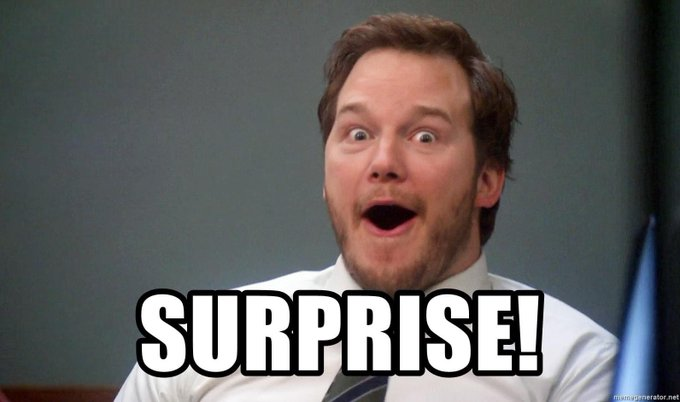

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("./data/sample_submission.csv")

In [ ]:
sample.head()

In [ ]:
sample.shape

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({'laptop_ID':X_pred.index,'Price_in_euros':predictions_submit})

In [ ]:
submission.head()

In [ ]:
submission.shape

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [ ]:
chequeador(submission)